In [28]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt

In [29]:
train = pd.read_csv('Train_SU63ISt.csv')
test = pd.read_csv('Test_0qrQsBZ.csv')
train.dtypes

ID           int64
Datetime    object
Count        int64
dtype: object

In [31]:
test.head()

,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00
3,18291,26-09-2014 03:00
4,18292,26-09-2014 04:00


In [32]:
train['Datetime'] = pd.to_datetime(train['Datetime'])
test['Datetime'] = pd.to_datetime(train['Datetime'])

In [33]:
train.dtypes

ID                   int64
Datetime    datetime64[ns]
Count                int64
dtype: object

In [34]:
test.dtypes

ID                   int64
Datetime    datetime64[ns]
dtype: object

In [35]:
train['hour'] = train.Datetime.dt.hour

In [36]:
train.head()

,ID,Datetime,Count,hour
0,0,2012-08-25 00:00:00,8,0
1,1,2012-08-25 01:00:00,2,1
2,2,2012-08-25 02:00:00,6,2
3,3,2012-08-25 03:00:00,2,3
4,4,2012-08-25 04:00:00,2,4


In [37]:
hourly_frac = train.groupby(['hour']).mean()/np.sum(train.groupby(['hour']).mean())
hourly_frac.drop(['ID'], axis = 1, inplace = True)
hourly_frac.columns = ['fraction']

train.index = train.Datetime
train.drop(['ID','hour','Datetime'], axis = 1, inplace = True)

daily_train = train.resample('D').sum()

In [38]:
daily_train['ds'] = daily_train.index
daily_train['y'] = daily_train.Count
daily_train.drop(['Count'],axis = 1, inplace = True)

In [56]:
m = Prophet(daily_seasonality = True, seasonality_prior_scale=0.1)
m.fit(daily_train)
future = m.make_future_dataframe(periods=852)
forecast = m.predict(future)

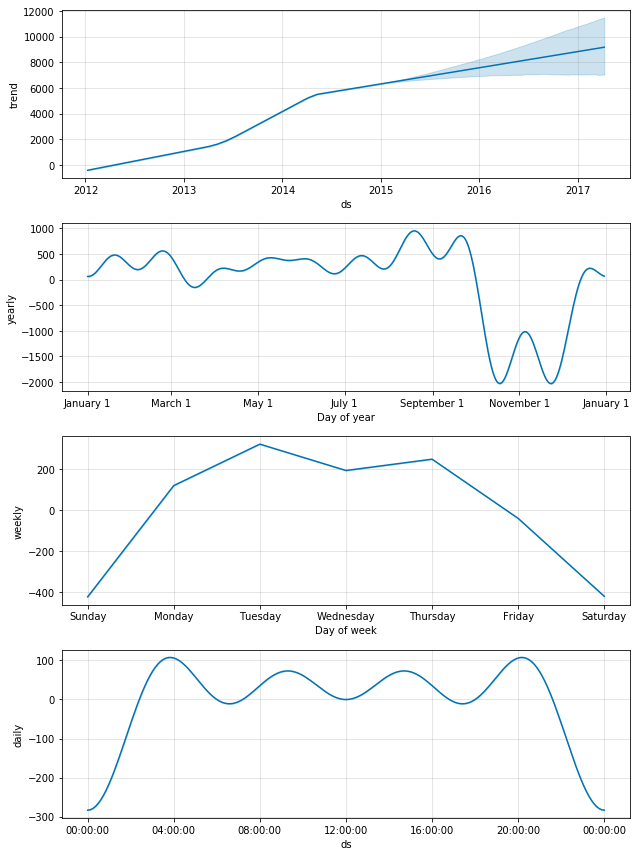

In [63]:
m.plot_components(forecast)
plt.savefig('trend.jpg')

In [42]:
forecast[["ds","trend","yhat", "yhat_lower", "yhat_upper"]].tail()

,ds,trend,yhat,yhat_lower,yhat_upper
1913,2017-04-05,9160.450910,9289.053410,5831.277113,12918.761766
1914,2017-04-06,9163.897749,9351.766569,5858.592592,12780.697792
1915,2017-04-07,9167.344589,9066.998469,5288.945606,12620.953838
1916,2017-04-08,9170.791428,8688.157166,4950.766379,12279.391605
1917,2017-04-09,9174.238267,8684.845537,5092.038972,12462.107927


In [44]:
help(Prophet)

Help on class Prophet in module fbprophet.forecaster:

class Prophet(builtins.object)
 |  Prophet forecaster.
 |  
 |  Parameters
 |  ----------
 |  growth: String 'linear' or 'logistic' to specify a linear or logistic
 |      trend.
 |  changepoints: List of dates at which to include potential changepoints. If
 |      not specified, potential changepoints are selected automatically.
 |  n_changepoints: Number of potential changepoints to include. Not used
 |      if input `changepoints` is supplied. If `changepoints` is not supplied,
 |      then n_changepoints potential changepoints are selected uniformly from
 |      the first `changepoint_range` proportion of the history.
 |  changepoint_range: Proportion of history in which trend changepoints will
 |      be estimated. Defaults to 0.8 for the first 80%. Not used if
 |      `changepoints` is specified.
 |  Not used if input `changepoints` is supplied.
 |  yearly_seasonality: Fit yearly seasonality.
 |      Can be 'auto', True, Fals